In [1]:
# First, load the required modules.
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import astropy
from sunpy.map import Map
import pfsspy

import sys
sys.path.append("./PsiPy/") # load PsiPy from local directory

from psipy.data import sample_data
from psipy.model import MASOutput
from psipy.tracing import FortranTracer


%load_ext autoreload
%autoreload 2


/home/pjzhang/.local/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load a set of MAS output files.
mas_path = 'corona/'   # sample_data.mas_sample_data() #
model = MASOutput(mas_path)

###############################################################################
# To trace field lines, start by creating a tracer. Then we create a set of
# seed points at which the field lines are drawn from.
tracer = FortranTracer(max_steps=2000)

lat = np.linspace(-np.pi *0.1, -np.pi*0.4, 6, endpoint=False)
lon = np.linspace(np.pi*0.9, 1.1 * np.pi, 6, endpoint=False)
lat, lon = np.meshgrid(lat, lon, indexing='ij')
lat, lon = lat.ravel() * u.rad, lon.ravel() * u.rad
r = 1.3 *np.ones(lat.shape)* const.R_sun

# Do the tracing!
flines = tracer.trace(model, r=r, lat=lat, lon=lon)

###############################################################################
# flines is a list, with each item containing a field line object
#print(flines[0])

In [3]:
aia211 = Map('./data/aia_lev1_211a_2022_05_19t12_00_09_63z_image_lev1.fits')

In [4]:
bp = model['bp']

# make a fake pfsspy output to reuse the plotting code
fake_pout = pfsspy.output.Output(
    bp.r_coords,bp.theta_coords,bp.phi_coords,None,
    Map('data/220519t1204gong.fits'))

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


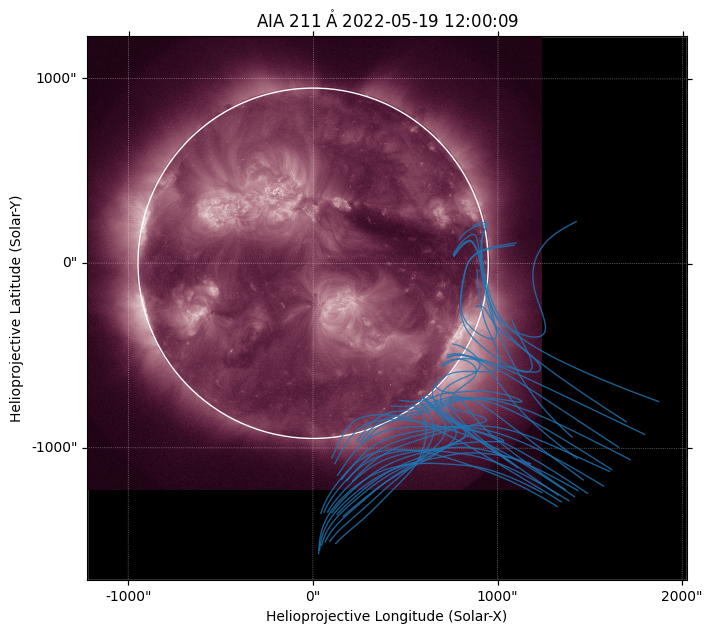

In [5]:
fig = plt.figure(figsize=[6,6])
origin_coord = np.array([721.2,-642.0]) 
#ax_im = fig.add_axes([0.1,0.1,0.8,0.8])
  
ax_im = fig.add_axes([0,0,1,1],projection=aia211) 
aia211.draw_limb()
aia211.plot()
ax_im.set_facecolor((0,0,0))


for fline in flines:
    if True:#~np.any(np.sqrt(fline.xyz[:,0]**2+fline.xyz[:,1]**2)<0.1):
        a_line = pfsspy.fieldline.FieldLine(fline.xyz[:,0],fline.xyz[:,1],fline.xyz[:,2],
            fake_pout)
        ax_im.plot_coord(a_line.coords, 
            alpha=0.8, linewidth=1, color='C0',zorder=100000)

